In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("C:/Users/sanke/Downloads/Stock_market.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [15]:
## Data Cleaning

In [17]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort by Date
df = df.sort_values('Date')

# Drop rows with missing dates
df = df.dropna(subset=['Date'])

# Fill missing numeric values (like 'Trades')
df = df.fillna(df.mean(numeric_only=True))


In [19]:
print(df.describe())
print("Unique symbols:", df['Symbol'].unique())


                                Date   Prev Close         Open         High  \
count                           3322  3322.000000  3322.000000  3322.000000   
mean   2014-08-14 03:47:08.416616448   344.114314   344.763019   351.608007   
min              2007-11-27 00:00:00   108.000000   108.000000   110.450000   
25%              2011-04-07 06:00:00   164.312500   164.850000   168.000000   
50%              2014-08-06 12:00:00   324.700000   325.750000   331.275000   
75%              2017-12-18 18:00:00   400.912500   401.000000   407.187500   
max              2021-04-30 00:00:00  1307.450000  1310.250000  1324.000000   
std                              NaN   192.936882   193.619992   198.617808   

               Low         Last        Close         VWAP        Volume  \
count  3322.000000  3322.000000  3322.000000  3322.000000  3.322000e+03   
mean    337.531969   344.239539   344.201626   344.853182  2.954564e+06   
min     105.650000   108.000000   108.000000   108.340000  1.23

In [21]:
# Line chart - stock price over time

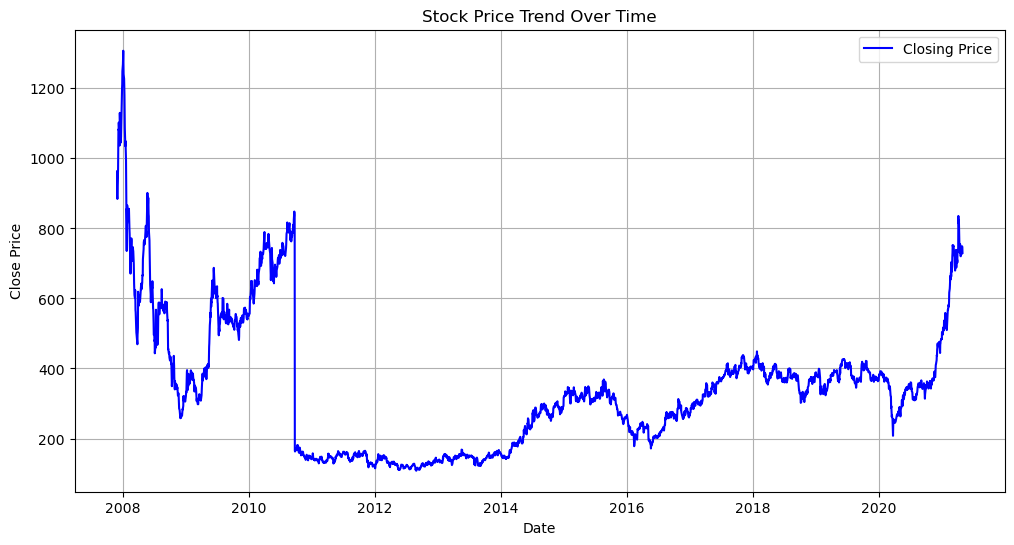

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title("Stock Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
## Moving Avg

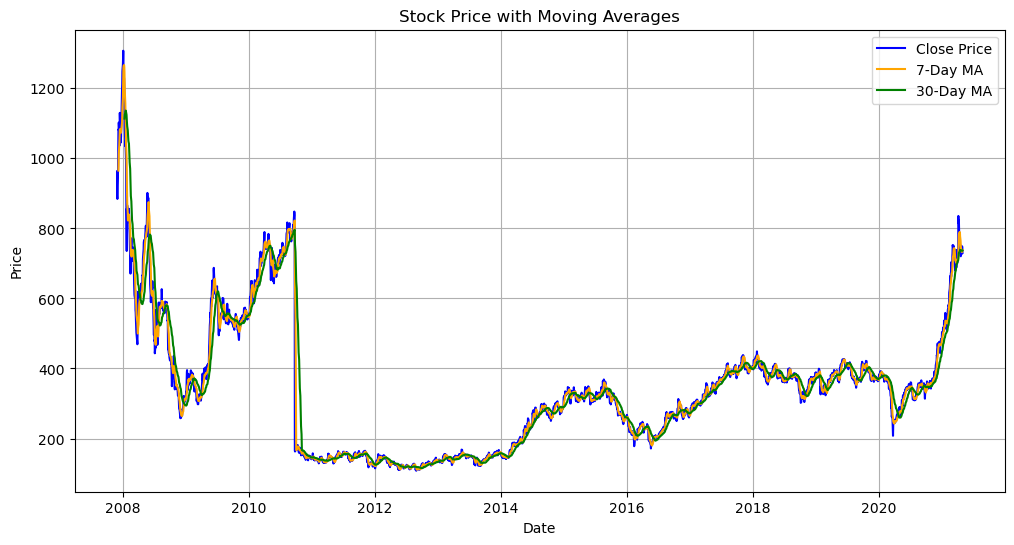

In [27]:
df['MA_7'] = df['Close'].rolling(window=7).mean()   # 7-day moving average
df['MA_30'] = df['Close'].rolling(window=30).mean() # 30-day moving average

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA_7'], label='7-Day MA', color='orange')
plt.plot(df['Date'], df['MA_30'], label='30-Day MA', color='green')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
## Correlation between stock price and volume

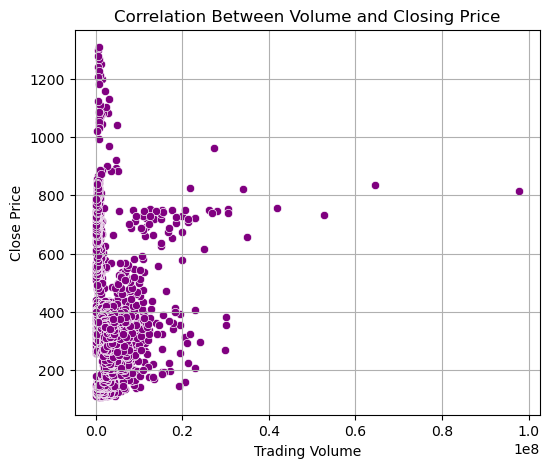

Correlation between Volume and Close Price: 0.07


In [31]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Volume', y='Close', data=df, color='purple')
plt.title("Correlation Between Volume and Closing Price")
plt.xlabel("Trading Volume")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

# Correlation value
correlation = df['Volume'].corr(df['Close'])
print(f"Correlation between Volume and Close Price: {correlation:.2f}")


In [33]:
## Seasonal pattern (monthly trend)

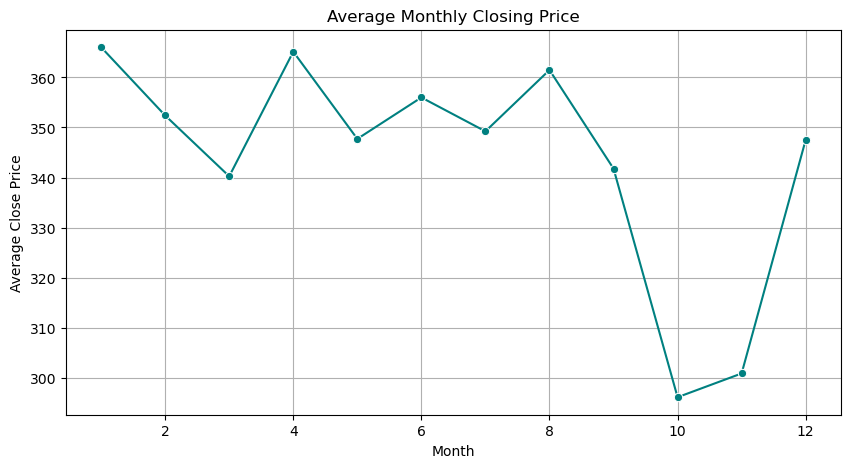

In [35]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='teal')
plt.title("Average Monthly Closing Price")
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.grid(True)
plt.show()


In [37]:
## ARIMA Forecasting (Futureprice Prediction)

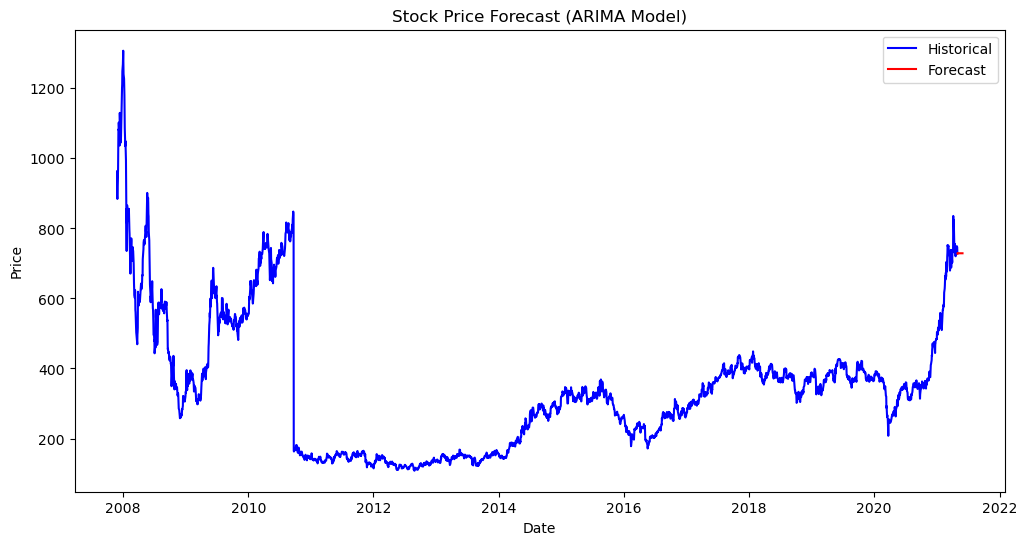

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# Set Date as index
df.set_index('Date', inplace=True)

# ARIMA model on 'Close' price
model = ARIMA(df['Close'], order=(5,1,0))  # (p,d,q)
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Historical', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=31, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title("Stock Price Forecast (ARIMA Model)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
